# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
[i for i in app_train.columns]

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [17]:
pd.cut(app_train['DAYS_BIRTH']/365, 5).value_counts()

(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(20.469, 30.238]    46806
(59.4, 69.121]      39662
Name: DAYS_BIRTH, dtype: int64

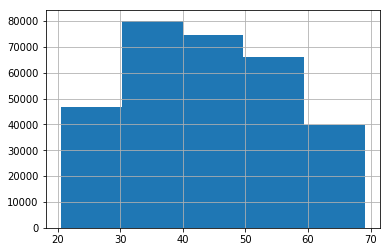

In [23]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
app_train['YEARS_BIRTH'].hist(bins=5)

In [37]:
app_train['YEARS_BIRTH_cut_5'] = pd.cut(app_train['YEARS_BIRTH'], 5)
print(app_train['YEARS_BIRTH_cut_5'].value_counts())
app_train.groupby(['YEARS_BIRTH_cut_5']).mean()[['TARGET', 'AMT_INCOME_TOTAL']]

(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(20.469, 30.238]    46806
(59.4, 69.121]      39662
Name: YEARS_BIRTH_cut_5, dtype: int64


,TARGET,AMT_INCOME_TOTAL
YEARS_BIRTH_cut_5,,
"(20.469, 30.238]",0.114494,159988.266032
"(30.238, 39.959]",0.095426,179046.033968
"(39.959, 49.679]",0.076894,180888.906934
"(49.679, 59.4]",0.062000,165913.430645
"(59.4, 69.121]",0.049644,140528.528580


In [38]:
app_train['YEARS_BIRTH_qcut_5'] = pd.qcut(app_train['YEARS_BIRTH'], 5)
print(app_train['YEARS_BIRTH_qcut_5'].value_counts())
app_train.groupby(['YEARS_BIRTH_qcut_5']).mean()[['TARGET', 'AMT_INCOME_TOTAL']]

(20.517, 32.038]    61512
(39.496, 47.178]    61509
(32.038, 39.496]    61504
(56.093, 69.121]    61495
(47.178, 56.093]    61491
Name: YEARS_BIRTH_qcut_5, dtype: int64


,TARGET,AMT_INCOME_TOTAL
YEARS_BIRTH_qcut_5,,
"(20.517, 32.038]",0.112824,163135.532389
"(32.038, 39.496]",0.093295,180361.102098
"(39.496, 47.178]",0.078493,181722.040185
"(47.178, 56.093]",0.067392,172226.486477
"(56.093, 69.121]",0.051630,146541.589065


In [39]:
app_train['AMT_INCOME_TOTAL_qcut_5'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 5)
print(app_train['AMT_INCOME_TOTAL_qcut_5'].value_counts())
app_train.groupby(['AMT_INCOME_TOTAL_qcut_5']).mean()[['TARGET', 'YEARS_BIRTH']]

(99000.0, 135000.0]        85756
(162000.0, 225000.0]       75513
(25649.999, 99000.0]       63671
(225000.0, 117000000.0]    47118
(135000.0, 162000.0]       35453
Name: AMT_INCOME_TOTAL_qcut_5, dtype: int64


,TARGET,YEARS_BIRTH
AMT_INCOME_TOTAL_qcut_5,,
"(25649.999, 99000.0]",0.082062,46.337211
"(99000.0, 135000.0]",0.085883,43.554632
"(135000.0, 162000.0]",0.086847,43.353773
"(162000.0, 225000.0]",0.080569,43.081516
"(225000.0, 117000000.0]",0.065198,43.199182


由上述分析可以發現，年齡愈小愈有可能是符合條件的Target，而年齡也會影響平均收入，約30-47歲的平均收入最高，其次為47-56歲，接著為20-32歲，56-69歲的平均收入最低。但若以平均收入來分組，則會發現平均收入和是否為Target的相關性較低。